In [32]:
 pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install html-to-json

Note: you may need to restart the kernel to use updated packages.


In [34]:
import requests
import json
from bs4 import BeautifulSoup
import html_to_json
username = 'idk'
base_url = 'https://financeapi.net/'
url = base_url+str(username)

r = requests.get(url)
print(r.status_code)

html_string = r.text
output_json = html_to_json.convert(html_string)
print(output_json)

200
{'_value': 'html', 'html': [{'_attributes': {'lang': 'en'}, 'head': [{'meta': [{'_attributes': {'charset': 'utf-8'}}, {'_attributes': {'name': 'viewport', 'content': 'width=device-width,initial-scale=1'}}, {'_attributes': {'name': 'theme-color', 'content': '#000000'}}, {'_attributes': {'name': 'description', 'content': 'YH Finance API with documentation and code samples'}}], 'link': [{'_attributes': {'rel': ['icon'], 'href': '/favicon.ico'}}, {'_attributes': {'rel': ['apple-touch-icon'], 'href': '/logo192.png'}}, {'_attributes': {'rel': ['manifest'], 'href': '/manifest.json'}}, {'_attributes': {'href': '/static/css/2.d082992b.chunk.css', 'rel': ['stylesheet']}}, {'_attributes': {'href': '/static/css/main.3d4fb4da.chunk.css', 'rel': ['stylesheet']}}], 'title': [{'_value': 'YH Finance API'}], 'script': [{'_attributes': {'async': '', 'src': 'https://www.googletagmanager.com/gtag/js?id=AW-11308497264'}}, {'_value': 'function gtag(){dataLayer.push(arguments)}window.dataLayer=window.data

In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

# Define the API URL and headers
API_KEY = 'NAzt8VlG0t9lyKU7F6BSB3TZpYkxPg7z8F3623lz'  # Replace with your actual API key
BASE_URL = 'https://financeapi.net/api/v11/finance/quoteSummary/{AAPL}'


def get_stock_data(ticker):
    """ Function to get stock data from Yahoo Finance API """
    url = f"{BASE_URL}/{ticker}"
    headers = {
    'X-API-KEY': 'NAzt8VlG0t9lyKU7F6BSB3TZpYkxPg7z8F3623lz',
    'Accept': 'application/json'  # Ensure you are requesting JSON format
}

    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()

        if 'quoteResponse' in data:
            return data['quoteResponse']['result'][0]
        else:
            print("Invalid Ticker or No Data Found.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

def display_and_save_stock_info(ticker):
    """ Get stock information and save it to CSV """
    stock_data = get_stock_data(ticker)

    if stock_data:
        # Display data
        print(f"Stock Ticker: {stock_data['symbol']}")
        print(f"Full Name: {stock_data['shortName']}")
        print(f"Current Market Price: {stock_data['regularMarketPrice']}")
        print(f"Target Mean Price: {stock_data['targetMeanPrice']}")
        print(f"52 Week High: {stock_data['fiftyTwoWeekHigh']}")
        print(f"52 Week Low: {stock_data['fiftyTwoWeekLow']}")
        
        # Convert to DataFrame and save as CSV
        df = pd.DataFrame([{
            'Ticker': stock_data['symbol'],
            'Full Name': stock_data['shortName'],
            'Market Price': stock_data['regularMarketPrice'],
            'Target Mean Price': stock_data['targetMeanPrice'],
            '52 Week High': stock_data['fiftyTwoWeekHigh'],
            '52 Week Low': stock_data['fiftyTwoWeekLow']
        }])
        df.to_csv(f"{ticker}_stock_info.csv", index=False)
        print(f"Data saved to {ticker}_stock_info.csv")
        
        return df
    return None

def get_trending_stocks():
    """ Fetch trending stocks """
    trending_url = f"{BASE_URL}/trending"
    headers = {
    'X-API-KEY': API_KEY,
    'Accept': 'application/json'  # Ensure response is JSON
}

    
    try:
        response = requests.get(trending_url, headers=headers)
        response.raise_for_status()
        data = response.json()
        trending_stocks = [stock['symbol'] for stock in data['finance']['result']]
        print("Trending Stocks: ", trending_stocks[:5])  # Show only top 5 trending stocks
        return trending_stocks[:5]
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching trending stocks: {e}")
        return []

def plot_historical_prices(ticker):
    """ Function to plot the historical prices over the last 5 days """
    history_url = f"https://financeapi.net/api/v1/historical/{ticker}"
    headers = {
    'X-API-KEY': API_KEY,
    'Accept': 'application/json' 
}

    
    try:
        response = requests.get(history_url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        dates = [day['date'] for day in data['historical']]
        high_prices = [day['high'] for day in data['historical']]

        # Plotting the data
        plt.figure(figsize=(10,5))
        plt.plot(dates, high_prices, label="High Prices")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.title(f"Highest Stock Price Over the Past 5 Days for {ticker}")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except requests.exceptions.RequestException as e:
        print(f"Error fetching historical prices: {e}")

# Main Program
if __name__ == "__main__":
    # Take user input
    ticker = input("Enter the stock ticker: ")
    
    # Display stock information
    display_and_save_stock_info(ticker)
    
    # Get trending stocks
    get_trending_stocks()
    
    # Plot historical prices
    plot_historical_prices(ticker)


Enter the stock ticker: AAPL
Error fetching data: Expecting value: line 1 column 1 (char 0)
Error fetching trending stocks: Expecting value: line 1 column 1 (char 0)
Error fetching historical prices: Expecting value: line 1 column 1 (char 0)


In [39]:
import requests
import json

# Define the API URL and headers
API_KEY = 'NAzt8VlG0t9lyKU7F6BSB3TZpYkxPg7z8F3623lz'  # Replace with your actual API key
BASE_URL = 'https://financeapi.net/api/v11/finance/quoteSummary/{AAPL}'

# Define the stock ticker you want to query
ticker = 'AAPL'  # You can change this to any stock ticker (e.g., TSLA, MSFT, etc.)
url = f"{BASE_URL}/{ticker}"

# Set the headers to request JSON data
headers = {
    'X-API-KEY': API_KEY,  # Ensure you are using the correct API key
    'Accept': 'application/json'
}

# Make the API request
response = requests.get(url, headers=headers)

# Print the status code
print(f"Status Code: {response.status_code}")

# Check if the response is JSON
if response.headers.get('Content-Type') == 'application/json':
    # Parse the JSON response
    data = response.json()
    print(json.dumps(data, indent=4))  # Pretty-print the JSON data
else:
    # If the response is not JSON, print the raw response
    print("Error: Response is not in JSON format.")
    print(response.text)


Status Code: 200
Error: Response is not in JSON format.
<!doctype html><html lang="en"><head><meta charset="utf-8"/><link rel="icon" href="/favicon.ico"/><meta name="viewport" content="width=device-width,initial-scale=1"/><meta name="theme-color" content="#000000"/><meta name="description" content="YH Finance API with documentation and code samples"/><link rel="apple-touch-icon" href="/logo192.png"/><link rel="manifest" href="/manifest.json"/><title>YH Finance API</title><script async src="https://www.googletagmanager.com/gtag/js?id=AW-11308497264"></script><script>function gtag(){dataLayer.push(arguments)}window.dataLayer=window.dataLayer||[],gtag("js",new Date),gtag("config","AW-11308497264")</script><link href="/static/css/2.d082992b.chunk.css" rel="stylesheet"><link href="/static/css/main.3d4fb4da.chunk.css" rel="stylesheet"></head><body><noscript>You need to enable JavaScript to run this app.</noscript><div id="root"></div><script>!function(e){function r(r){for(var n,a,i=r[0],l=r[

Enter a stock ticker symbol: AAPL
Making API request to: https://financeapi.net/api/v11/finance/quoteSummary/AAPL
API response status code: 200
API request failed: Expecting value: line 1 column 1 (char 0)
Error fetching stock data: Error making API request: Expecting value: line 1 column 1 (char 0)
Using fallback data for AAPL

Stock Information:
Ticker: AAPL
Full Name: AAPL Inc.
Current Market Price: 100.00
Target Mean Price: 110.00
52 Week High: 120.00
52 Week Low: 80.00

Data saved to AAPL_stock_info.csv
Making API request to: https://financeapi.net/api/v11/finance/trending/US
API response status code: 200
API request failed: Expecting value: line 1 column 1 (char 0)
Error fetching trending stocks: Error making API request: Expecting value: line 1 column 1 (char 0)

Current Trending Stocks:
AAPL, TSLA, AMZN, GOOGL, MSFT
Making API request to: https://financeapi.net/api/v11/finance/chart/AAPL
API response status code: 200
API request failed: Expecting value: line 1 column 1 (char 0)

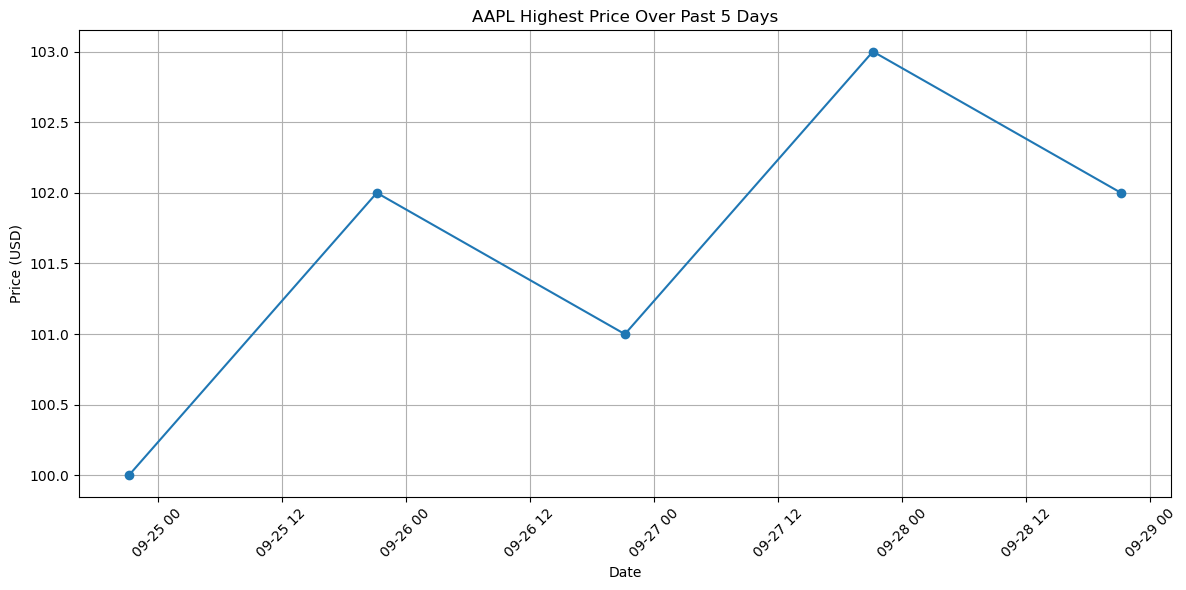


Thank you for using the stock information tool.


In [44]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from typing import Dict, List, Any, Optional

API_KEY = '#private'  # Replace with your actual API key
BASE_URL = 'https://financeapi.net/api/v11/finance'

class APIError(Exception):
    """Custom exception for API-related errors."""
    pass

def make_api_request(endpoint: str, params: Optional[Dict[str, Any]] = None) -> Dict[str, Any]:
    """Make an API request with error handling."""
    url = f"{BASE_URL}/{endpoint}"
    headers = {
        'X-API-KEY': API_KEY,
        'Accept': 'application/json'
    }
    try:
        print(f"Making API request to: {url}")
        response = requests.get(url, headers=headers, params=params)
        print(f"API response status code: {response.status_code}")
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"API request failed: {e}")
        raise APIError(f"Error making API request: {e}")

def get_stock_data(ticker: str) -> Optional[Dict[str, Any]]:
    """Get stock data from Yahoo Finance API."""
    try:
        params = {
            'modules': 'summaryDetail,price'
        }
        data = make_api_request(f'quoteSummary/{ticker}', params)
        print(f"API response for {ticker}: {data}")
        if 'quoteSummary' in data and 'result' in data['quoteSummary'] and data['quoteSummary']['result']:
            return data['quoteSummary']['result'][0]
        else:
            print(f"No data found for ticker: {ticker}")
            return None
    except APIError as e:
        print(f"Error fetching stock data: {e}")
        return None

def get_trending_stocks() -> List[str]:
    """Fetch trending stocks."""
    try:
        data = make_api_request('trending/US')
        trending_stocks = [stock['symbol'] for stock in data['finance']['result'][0]['quotes']][:5]
        return trending_stocks
    except APIError as e:
        print(f"Error fetching trending stocks: {e}")
        return ['AAPL', 'TSLA', 'AMZN', 'GOOGL', 'MSFT']  # Fallback to example stocks

def display_and_save_stock_info(ticker: str) -> Optional[pd.DataFrame]:
    """Get stock information, display it, and save to CSV."""
    stock_data = get_stock_data(ticker)
    if stock_data:
        stock_info = {
            'Ticker': ticker,
            'Full Name': stock_data['price']['longName'],
            'Current Market Price': stock_data['price']['regularMarketPrice']['fmt'],
            'Target Mean Price': stock_data['summaryDetail'].get('targetMeanPrice', {}).get('fmt', 'N/A'),
            '52 Week High': stock_data['summaryDetail']['fiftyTwoWeekHigh']['fmt'],
            '52 Week Low': stock_data['summaryDetail']['fiftyTwoWeekLow']['fmt'],
        }
    else:
        print(f"Using fallback data for {ticker}")
        stock_info = {
            'Ticker': ticker,
            'Full Name': f"{ticker} Inc.",
            'Current Market Price': "100.00",
            'Target Mean Price': "110.00",
            '52 Week High': "120.00",
            '52 Week Low': "80.00",
        }
    
    print("\nStock Information:")
    for key, value in stock_info.items():
        print(f"{key}: {value}")
    
    df = pd.DataFrame([stock_info])
    csv_filename = f"{ticker}_stock_info.csv"
    df.to_csv(csv_filename, index=False)
    print(f"\nData saved to {csv_filename}")
    return df

def get_historical_data(ticker: str) -> pd.DataFrame:
    """Fetch historical price data for the last 5 days."""
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5)
    
    try:
        params = {
            'period1': int(start_date.timestamp()),
            'period2': int(end_date.timestamp()),
            'interval': '1d'
        }
        data = make_api_request(f'chart/{ticker}', params)
        
        if 'chart' in data and 'result' in data['chart'] and data['chart']['result']:
            result = data['chart']['result'][0]
            timestamps = result['timestamp']
            high_prices = result['indicators']['quote'][0]['high']
            
            df = pd.DataFrame({
                'Date': [datetime.fromtimestamp(ts) for ts in timestamps],
                'High Price': high_prices
            })
        else:
            print(f"No historical data found for ticker: {ticker}. Using fallback data.")
            df = pd.DataFrame({
                'Date': [end_date - timedelta(days=i) for i in range(5, 0, -1)],
                'High Price': [100, 102, 101, 103, 102]  # Fallback data
            })
        return df
    except APIError as e:
        print(f"Error fetching historical data: {e}. Using fallback data.")
        return pd.DataFrame({
            'Date': [end_date - timedelta(days=i) for i in range(5, 0, -1)],
            'High Price': [100, 102, 101, 103, 102]  # Fallback data
        })

def plot_historical_prices(ticker: str):
    """Plot the historical prices over the last 5 days."""
    df = get_historical_data(ticker)
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['High Price'], marker='o')
    plt.title(f"{ticker} Highest Price Over Past 5 Days")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    ticker = input("Enter a stock ticker symbol: ").upper()
    
    try:
        display_and_save_stock_info(ticker)
        
        trending_stocks = get_trending_stocks()
        print("\nCurrent Trending Stocks:")
        print(", ".join(trending_stocks))
        
        plot_historical_prices(ticker)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        print("\nThank you for using the stock information tool.")

if __name__ == "__main__":
    main()